In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_regression
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

In [2]:
#Importing Dataset de vente
raw = pd.read_excel('./output_vente_appart.xlsx')

#Visualizing Dataset Head
raw.head()

,pieces,etage,quartier,superficie,wilaya,commune,jardin,elec,gaz,eau,...,garage,act notaire,Livret foncier,Promotion immobiliÃ¨re,Paiement par tranches,Promesse de vente,CrÃ©dit bancaire,prix,lien,time_added
0,4,1,Bateaux casse,103,Alger,bordj el kiffan,0,1,1,1,...,1,1,0,1,1,0,0,9800000,https://www.ouedkniss.com/vente-appartement-f4...,2021
1,3,4,AIN MASSOUD,78,Tipaza,chaiba,0,1,1,1,...,0,0,0,0,0,0,0,0,https://www.ouedkniss.com/vente-appartement-f3...,2021
2,3,1,GASRIA.,80,Setif,setif,0,1,1,1,...,0,1,1,1,0,0,0,14000000,https://www.ouedkniss.com/vente-appartement-f3...,2021
3,4,4,Oued Tarfa,122,Alger,draria,0,1,1,1,...,0,1,1,0,0,0,0,22000000,https://www.ouedkniss.com/vente-appartement-f4...,2021
4,3,3,Nouvelle ville (les 450 logements),98,Tizi ouzou,tizi ouzou,0,1,1,1,...,0,1,1,0,0,0,0,0,https://www.ouedkniss.com/vente-appartement-f3...,2021


In [3]:
data = raw.drop(["quartier", "time_added", "lien"], axis=1)
data

,pieces,etage,superficie,wilaya,commune,jardin,elec,gaz,eau,meublÃ©,garage,act notaire,Livret foncier,Promotion immobiliÃ¨re,Paiement par tranches,Promesse de vente,CrÃ©dit bancaire,prix
0,4,1,103,Alger,bordj el kiffan,0,1,1,1,0,1,1,0,1,1,0,0,9800000
1,3,4,78,Tipaza,chaiba,0,1,1,1,0,0,0,0,0,0,0,0,0
2,3,1,80,Setif,setif,0,1,1,1,0,0,1,1,1,0,0,0,14000000
3,4,4,122,Alger,draria,0,1,1,1,0,0,1,1,0,0,0,0,22000000
4,3,3,98,Tizi ouzou,tizi ouzou,0,1,1,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36519,6,2,152,Naama,ain sefra,0,1,1,1,0,0,1,1,1,0,1,0,5000000
36520,5,2,205,Sidi bel abbes,sidi bel abbes,0,1,1,1,1,0,1,1,0,0,0,0,15000000
36521,4,2,112,Boumerdes,boumerdes,0,1,1,1,0,1,1,1,1,0,0,0,112
36522,3,2,80,Oran,ain el turck,1,1,0,1,0,0,1,0,0,0,0,0,7600000


In [4]:
#Deleting irrelevant data entries
data = data[data.prix != 0]
data = data[data.superficie != 0]
data = data[data.superficie != "superficie"]
data = data.dropna(axis="rows")
data = data[data.prix >= 3500000]

data

,pieces,etage,superficie,wilaya,commune,jardin,elec,gaz,eau,meublÃ©,garage,act notaire,Livret foncier,Promotion immobiliÃ¨re,Paiement par tranches,Promesse de vente,CrÃ©dit bancaire,prix
0,4,1,103,Alger,bordj el kiffan,0,1,1,1,0,1,1,0,1,1,0,0,9800000
2,3,1,80,Setif,setif,0,1,1,1,0,0,1,1,1,0,0,0,14000000
3,4,4,122,Alger,draria,0,1,1,1,0,0,1,1,0,0,0,0,22000000
7,4,1,95,Alger,el biar,1,1,1,1,0,0,1,1,0,0,0,0,22000000
8,4,2,86,Alger,draria,0,1,1,1,0,0,1,1,0,0,0,0,25000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36518,4,3,90,Boumerdes,dellys,1,1,1,1,0,1,1,0,1,1,1,1,8000000
36519,6,2,152,Naama,ain sefra,0,1,1,1,0,0,1,1,1,0,1,0,5000000
36520,5,2,205,Sidi bel abbes,sidi bel abbes,0,1,1,1,1,0,1,1,0,0,0,0,15000000
36522,3,2,80,Oran,ain el turck,1,1,0,1,0,0,1,0,0,0,0,0,7600000


In [5]:
# Deleting outliers
# --> Price outliers
Q3 = data["prix"].quantile(0.95)
data = data[data.prix <= Q3]

# --> Pièces outliers
Q1 = data["pieces"].quantile(0.05)
Q3 = data["pieces"].quantile(0.95)
data = data[(data.pieces >= Q1) & (data.pieces <= Q3)]

# --> Superficie outliers
Q1 = data["superficie"].quantile(0.05)
Q3 = data["superficie"].quantile(0.95)
data = data[(data.superficie >= Q1) & (data.superficie <= Q3)]

In [6]:
#Describing Data
data.describe()

,pieces,etage,superficie,wilaya,commune,jardin,elec,gaz,eau,meublÃ©,garage,act notaire,Livret foncier,Promotion immobiliÃ¨re,Paiement par tranches,Promesse de vente,CrÃ©dit bancaire,prix
count,14733,14733,14733,14733,14733,14733,14733,14733,14733,14733,14733,14733,14733,14733,14733,14733,14733,14733
unique,4,43,97,46,473,3,3,3,3,3,3,3,3,3,3,3,3,455
top,3,1,75,Alger,oran,0,1,1,1,0,0,1,1,0,0,0,0,12000000
freq,8495,3717,1175,6633,538,12822,13277,13202,13248,13023,12125,11491,7989,12661,13760,13115,13583,550


<AxesSubplot:xlabel='superficie', ylabel='prix'>

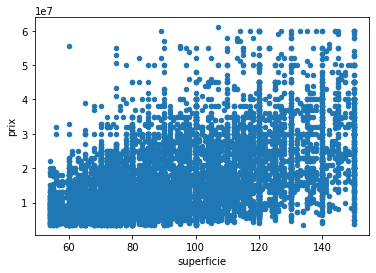

In [7]:
#Plotting Price/Surface
data.plot.scatter(x="superficie", y="prix")

In [8]:
ordinalEncoder = OrdinalEncoder()

oe_wilaya = ordinalEncoder.fit_transform(data[["wilaya"]]).astype("int")
oe_commune = ordinalEncoder.fit_transform(data[["commune"]]).astype("int")

data.wilaya = oe_wilaya
data.commune = oe_commune

data.superficie = data.superficie.astype("float32")
data.prix = data.prix.astype("float32")

data

,pieces,etage,superficie,wilaya,commune,jardin,elec,gaz,eau,meublÃ©,garage,act notaire,Livret foncier,Promotion immobiliÃ¨re,Paiement par tranches,Promesse de vente,CrÃ©dit bancaire,prix
0,4,1,103.0,3,128,0,1,1,1,0,1,1,0,1,1,0,0,9800000.0
2,3,1,80.0,34,396,0,1,1,1,0,0,1,1,1,0,0,0,14000000.0
3,4,4,122.0,3,200,0,1,1,1,0,0,1,1,0,0,0,0,22000000.0
7,4,1,95.0,3,212,1,1,1,1,0,0,1,1,0,0,0,0,22000000.0
8,4,2,86.0,3,200,0,1,1,1,0,0,1,1,0,0,0,0,25000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36513,3,5,68.0,12,366,1,1,1,1,0,0,1,1,0,0,0,0,9000000.0
36517,2,4,63.0,2,230,0,1,0,1,0,0,1,1,0,0,0,0,4350000.0
36518,4,3,90.0,12,184,1,1,1,1,0,1,1,0,1,1,1,1,8000000.0
36522,3,2,80.0,29,22,1,1,0,1,0,0,1,0,0,0,0,0,7600000.0


In [9]:
#Calculating MI Scores after Data Cleaning and Ordinal Encoding
X = data.copy()
X = X.drop("prix", axis=1)
y = data["prix"]

In [10]:
#MI Calculation methods
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [11]:
mi_scores = make_mi_scores(X, y, False)
print(mi_scores)

commune                   0.618187
wilaya                    0.441900
superficie                0.367058
pieces                    0.104407
garage                    0.098286
Livret foncier            0.063908
act notaire               0.056328
Promotion immobiliÃ¨re    0.052159
Promesse de vente         0.043957
eau                       0.042741
jardin                    0.039052
Paiement par tranches     0.035551
meublÃ©                   0.035191
etage                     0.030916
elec                      0.030871
gaz                       0.029337
CrÃ©dit bancaire          0.028629
Name: MI Scores, dtype: float64


In [12]:
#Plotting MI Scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

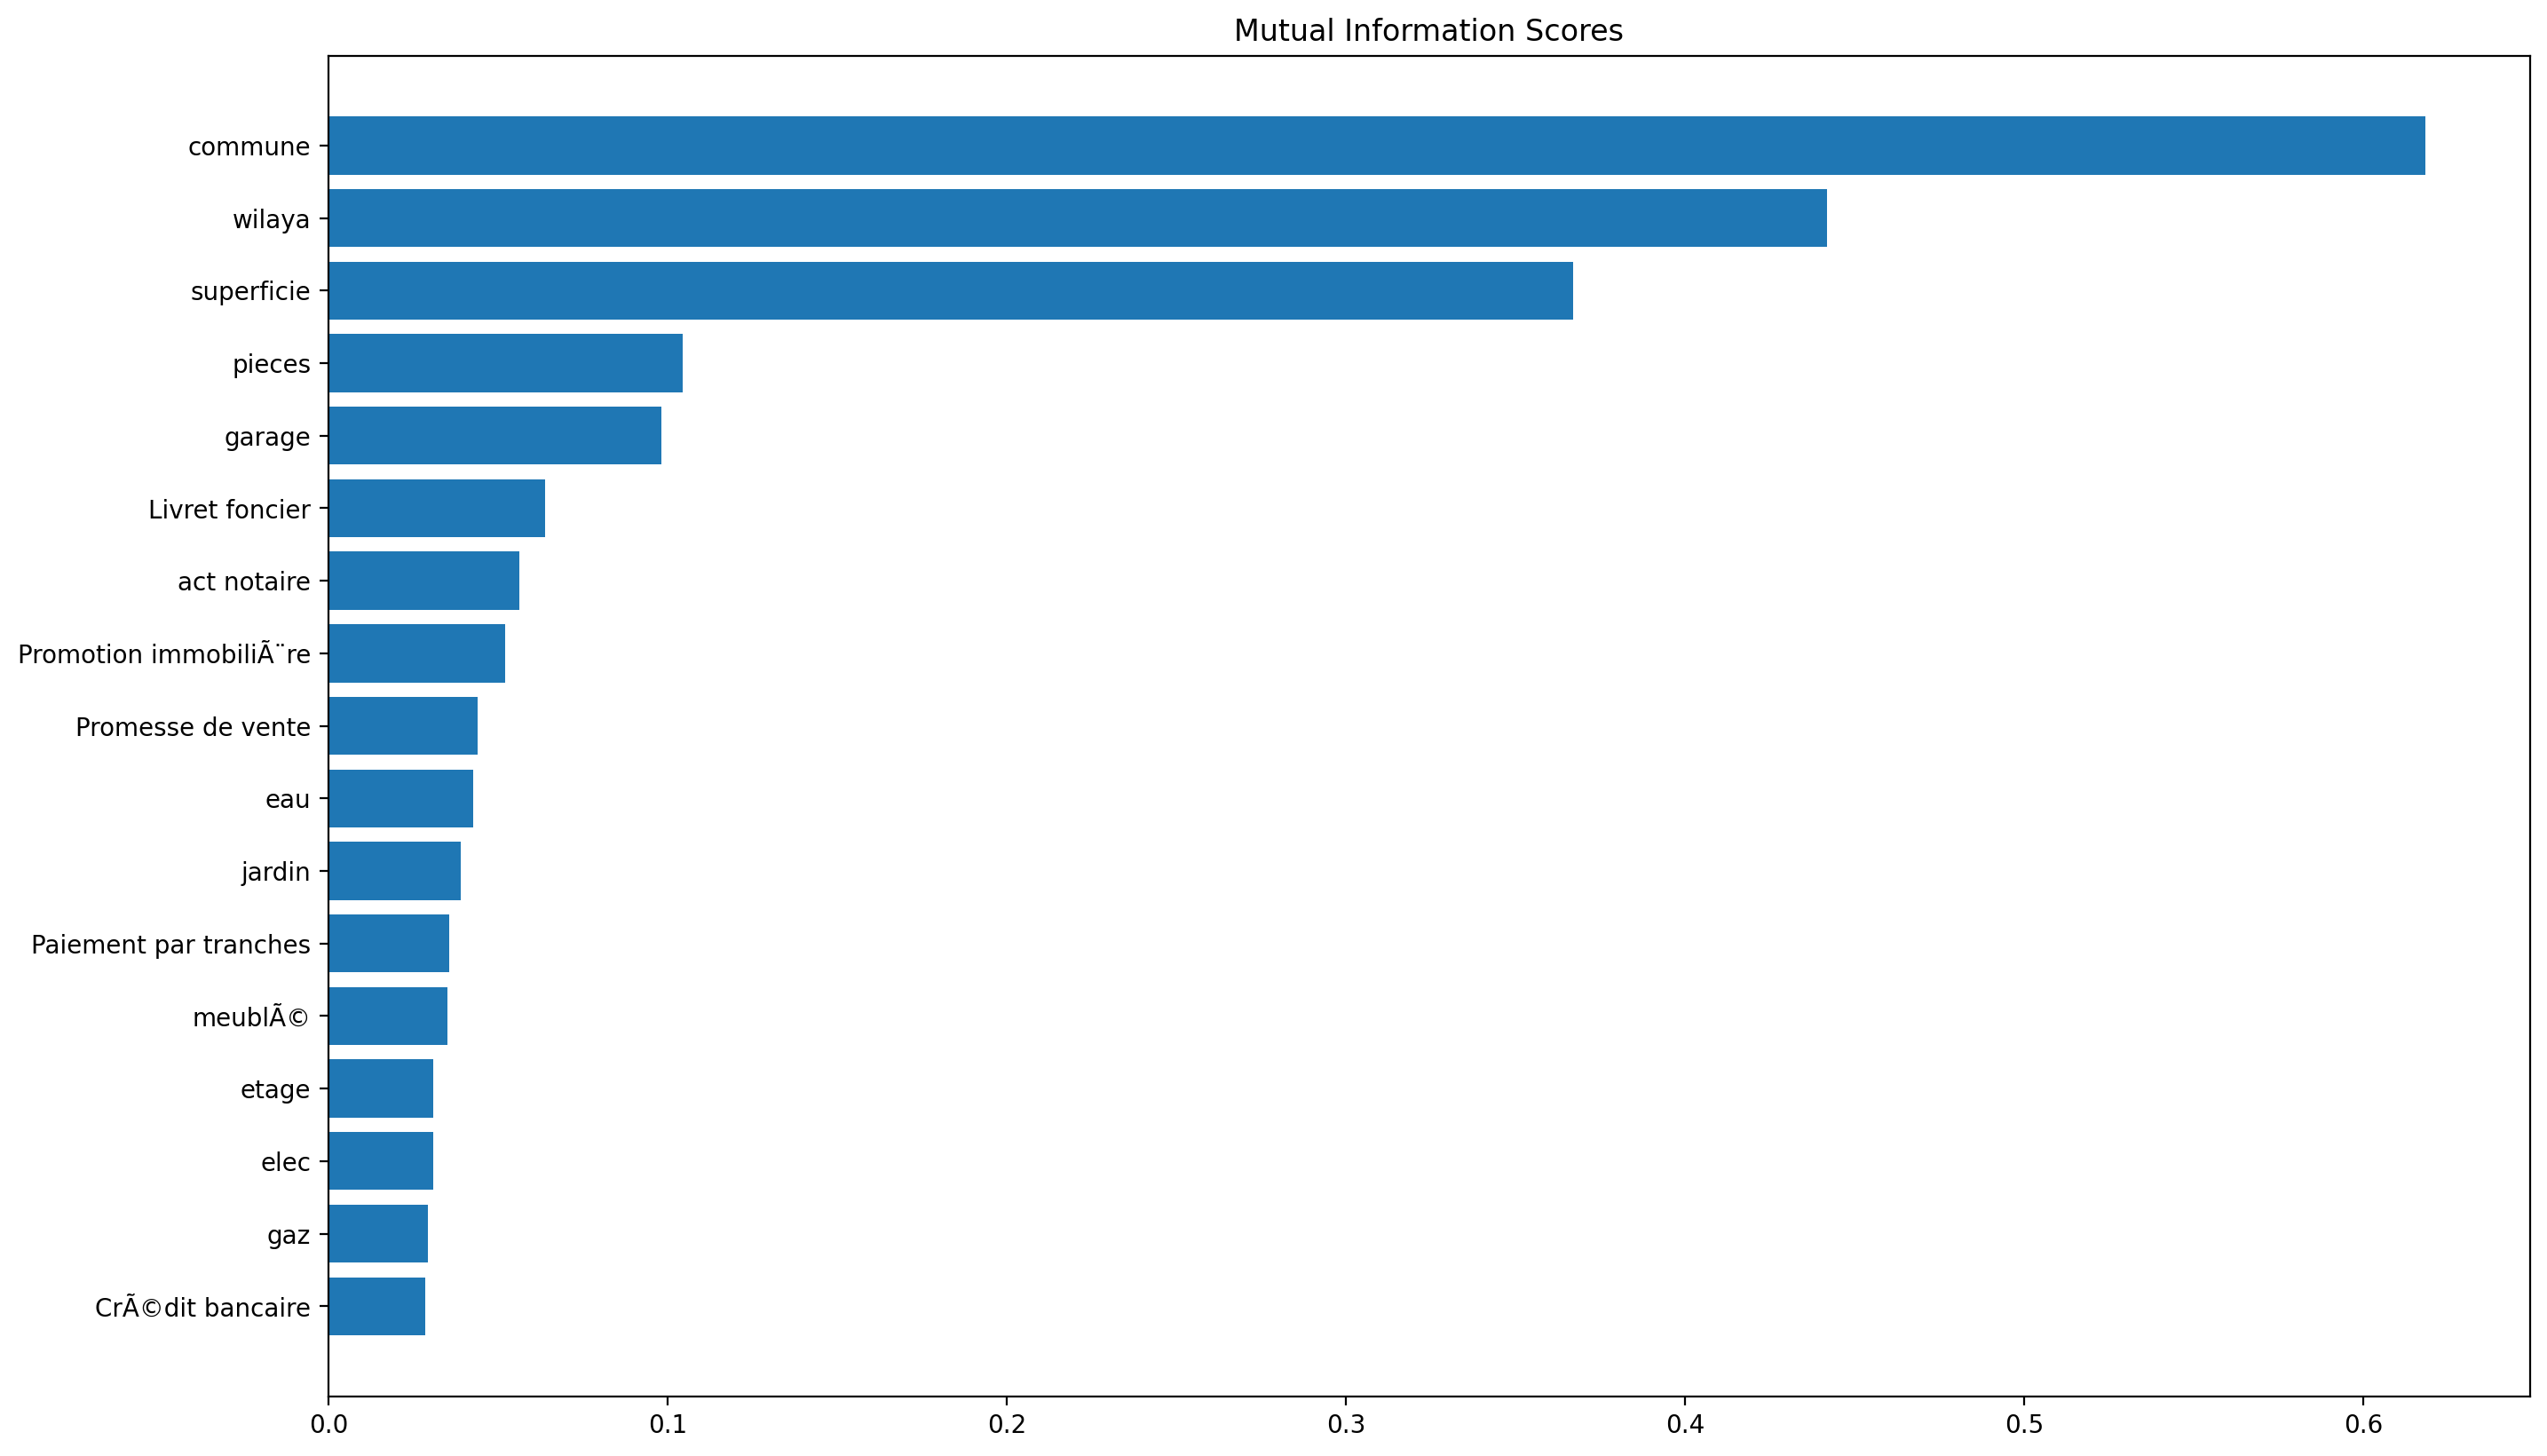

In [13]:
plt.figure(dpi=200, figsize=(16, 10))
plot_mi_scores(mi_scores)
plt.show()

In [14]:
#Initial Basic Training
appa_vente_model = DecisionTreeRegressor()

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
appa_vente_model.fit(train_X, train_y)
predictions = appa_vente_model.predict(val_X)

print(mean_absolute_error(predictions, val_y))

3647168.7799848765


In [15]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

for max_leaf_nodes in [50, 100, 150, 200, 300, 500, 1000, 2000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 50  		 Mean Absolute Error:  3616701
Max leaf nodes: 100  		 Mean Absolute Error:  3482178
Max leaf nodes: 150  		 Mean Absolute Error:  3471668
Max leaf nodes: 200  		 Mean Absolute Error:  3455973
Max leaf nodes: 300  		 Mean Absolute Error:  3427237
Max leaf nodes: 500  		 Mean Absolute Error:  3415818
Max leaf nodes: 1000  		 Mean Absolute Error:  3444974
Max leaf nodes: 2000  		 Mean Absolute Error:  3506228


In [16]:
print(train_X)

      pieces etage  superficie  wilaya  commune jardin elec gaz eau meublÃ©  \
18058      3     4        70.0       7      448      0    0   0   0       0   
407        4     1        90.0       3      185      0    1   1   1       0   
11632      4     1       120.0      29      340      0    1   1   1       0   
31994      3     3        64.0       4      219      0    1   1   1       0   
5804       2     2        69.0      14      178      0    1   1   1       0   
...      ...   ...         ...     ...      ...    ...  ...  ..  ..     ...   
31548      3     3        67.0       9      174      0    1   1   1       0   
7524       4     1        89.0      42      242      0    1   1   1       0   
21303      4     3       100.0       3      305      0    1   1   1       0   
24183      3     3        92.0       7      226      0    1   1   1       0   
6294       4     4       120.0      29      340      0    1   1   1       0   

      garage act notaire Livret foncier Promotion i

In [17]:
#Target Encoding
data_ = data.copy()

encodings = data_.groupby('wilaya')['prix'].mean().reset_index()
data_ = data_.merge(encodings, how='left', on='wilaya')
data_.drop('wilaya', axis=1, inplace=True)

inter =((data_.prix_y-data_.prix_y.min())/((data_.prix_y.max()-data_.prix_y.min())*0.0005)).astype('float')

data_.prix_y = inter
encodings = data_.groupby('commune')['prix_x'].mean().reset_index()
data_ = data_.merge(encodings, how='left', on='commune')
data_.drop('commune', axis=1, inplace=True)

data_.prix_x_y = ((data_.prix_x_y-data_.prix_x_y.min())/((data_.prix_x_y.max()-data_.prix_x_y.min())*0.0005)).astype('float')

y_ = data_.prix_x_x
X_ = data_.drop(["prix_x_x"], axis=1)

print(data_.prix_y)

0        2000.000000
1         829.338806
2        2000.000000
3        2000.000000
4        2000.000000
            ...     
14728     844.460327
14729     478.216888
14730     844.460327
14731     920.817261
14732     853.704590
Name: prix_y, Length: 14733, dtype: float64


In [18]:
train_X, val_X, train_y, val_y = train_test_split(X_, y_, random_state = 0)

for max_leaf_nodes in [10, 50, 100, 150, 200, 300, 500, 1000, 2000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 10  		 Mean Absolute Error:  3479686
Max leaf nodes: 50  		 Mean Absolute Error:  2950262
Max leaf nodes: 100  		 Mean Absolute Error:  2916264
Max leaf nodes: 150  		 Mean Absolute Error:  2923898
Max leaf nodes: 200  		 Mean Absolute Error:  2910270
Max leaf nodes: 300  		 Mean Absolute Error:  2901295
Max leaf nodes: 500  		 Mean Absolute Error:  2903545
Max leaf nodes: 1000  		 Mean Absolute Error:  2966138
Max leaf nodes: 2000  		 Mean Absolute Error:  3104809


In [19]:
#Ideal Leaf Nodes Number = 300
#Target Encoding is really useful, so applying changes
X_.index = X.index
y_.index = y.index

X = X_
y = y_

X.rename(columns = {'prix_y': 'wilaya_targeted', 'prix_x_y': 'commune_targeted'}, inplace = True)
y.rename('prix', inplace = True)

0         9800000.0
2        14000000.0
3        22000000.0
7        22000000.0
8        25000000.0
            ...    
36513     9000000.0
36517     4350000.0
36518     8000000.0
36522     7600000.0
36523    12000000.0
Name: prix, Length: 14733, dtype: float32

In [20]:
#PCA Functions

def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

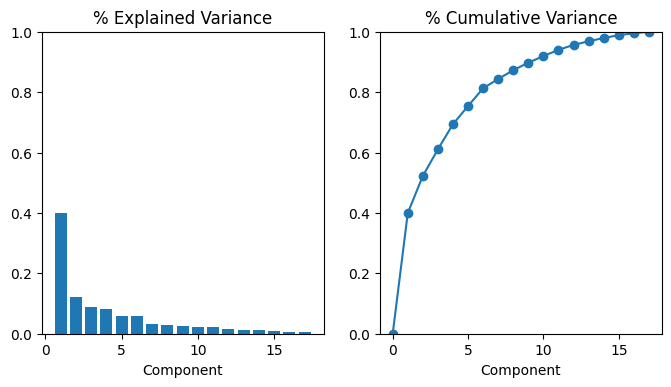

In [21]:
pca, X_pca, loadings = apply_pca(X)

# Explained variance
plot_variance(pca);

In [22]:
#Dropping other features
X_test = X.copy()
X_test = X_test.drop(["jardin", "elec", "gaz", "eau", "garage", "act notaire", "meublÃ©", "Paiement par tranches", "Promesse de vente", "CrÃ©dit bancaire", "Promotion immobiliÃ¨re", "Livret foncier"], axis=1)


train_X, val_X, train_y, val_y = train_test_split(X_test, y, random_state = 0)

for max_leaf_nodes in [10, 50, 100, 150, 200, 300, 500, 1000, 2000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 10  		 Mean Absolute Error:  3479686
Max leaf nodes: 50  		 Mean Absolute Error:  2972506
Max leaf nodes: 100  		 Mean Absolute Error:  2932658
Max leaf nodes: 150  		 Mean Absolute Error:  2949058
Max leaf nodes: 200  		 Mean Absolute Error:  2904145
Max leaf nodes: 300  		 Mean Absolute Error:  2868554
Max leaf nodes: 500  		 Mean Absolute Error:  2935670
Max leaf nodes: 1000  		 Mean Absolute Error:  3041807
Max leaf nodes: 2000  		 Mean Absolute Error:  3174049


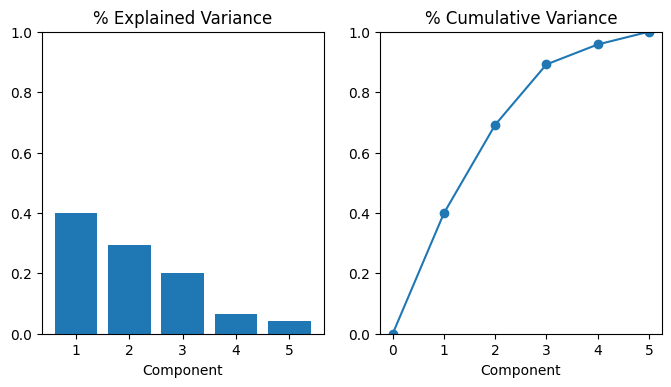

In [23]:
pca, X_pca, loadings = apply_pca(X_test)

# Explained variance
plot_variance(pca);

In [24]:
X_pca.index = X_test.index
X_test["PC1"] = X_pca.PC1
X_test["PC3"] = X_pca.PC3

In [25]:
train_X, val_X, train_y, val_y = train_test_split(X_test, y, random_state = 0)

for max_leaf_nodes in [10, 50, 100, 150, 200, 300, 500, 1000, 2000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 10  		 Mean Absolute Error:  3264814
Max leaf nodes: 50  		 Mean Absolute Error:  2982219
Max leaf nodes: 100  		 Mean Absolute Error:  2929940
Max leaf nodes: 150  		 Mean Absolute Error:  2916105
Max leaf nodes: 200  		 Mean Absolute Error:  2923263
Max leaf nodes: 300  		 Mean Absolute Error:  2948115
Max leaf nodes: 500  		 Mean Absolute Error:  2972868
Max leaf nodes: 1000  		 Mean Absolute Error:  3048178
Max leaf nodes: 2000  		 Mean Absolute Error:  3199119


In [26]:
#PCA wasn't efficient, dropping the method, continuing to use X, y

In [27]:
X_test = X.astype("int")
train_X, val_X, train_y, val_y = train_test_split(X_test, y, random_state = 0)

my_model = XGBRegressor(n_estimators=500, learning_rate=0.01, n_jobs=16)
my_model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(val_X, val_y)], verbose=False)

predictions = my_model.predict(val_X)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

Mean Absolute Error: 2587446.2


In [28]:
X = X.drop(["jardin", "elec", "gaz", "eau", "garage", "act notaire", "meublÃ©", "Paiement par tranches", "Promesse de vente", "CrÃ©dit bancaire", "Promotion immobiliÃ¨re", "Livret foncier"], axis=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [30]:
model = DecisionTreeRegressor(max_leaf_nodes=300, random_state=0)
model.fit(train_X, train_y)
my_pipeline = Pipeline(steps=[('model', model)
                             ])

scores = cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='r2')

print("R2 scores:\n", scores)

R2 scores:
 [0.75456396 0.70834633 0.70830587 0.69992798 0.71008698 0.7107532
 0.73435976 0.61117952 0.65851647 0.65175519]


In [31]:
print("Average R squared score (across experiments):")
print(scores.mean())

Average R squared score (across experiments):
0.6947795266107276


In [32]:
test_X = val_X[:100]
test_y = val_y[:100]

In [33]:
X_test = X.astype("int")
train_X, val_X, train_y, val_y = train_test_split(X_test, y, random_state = 0)

model = XGBRegressor(n_estimators=500, learning_rate=0.01, n_jobs=16)
model.fit(train_X, train_y)
predicted = model.predict(test_X)
te = pd.DataFrame(predicted, columns=["predict_y"])

te.index = test_y.index
te

,predict_y
22546,6789045.5
11203,38166076.0
5729,7455287.0
22444,8379805.0
2959,5802228.5
...,...
27637,6275108.5
34057,18252108.0
35553,13461535.0
1238,16350424.0


In [34]:
te["original_y"] = val_y
te["difference"] = (predicted-test_y)/test_y
te.to_excel(".//test.xlsx")

In [35]:
model = XGBRegressor(n_estimators=500, learning_rate=0.01, n_jobs=16)
model.fit(X_test, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [38]:
import joblib

joblib.dump(model, './/model.pkl')

['.//model.pkl']